In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.utils import shuffle
import time

import warnings
warnings.filterwarnings("ignore")

# Load MNIST dataset
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist.data, mnist.target.astype(int)

# Shuffle and take a stratified sample of 5000 samples
X, y = shuffle(X, y, random_state=42)
X_sample, _, y_sample, _ = train_test_split(X, y, train_size=5000, stratify=y, random_state=42)

# Split into training and testing sets (70:30)
X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size=0.3, stratify=y_sample, random_state=42)

MLP Model Accuracy: 0.81, Fit Time: 0.4038 seconds
Logistic Regression Model Accuracy: 0.83, Fit Time: 0.7844 seconds


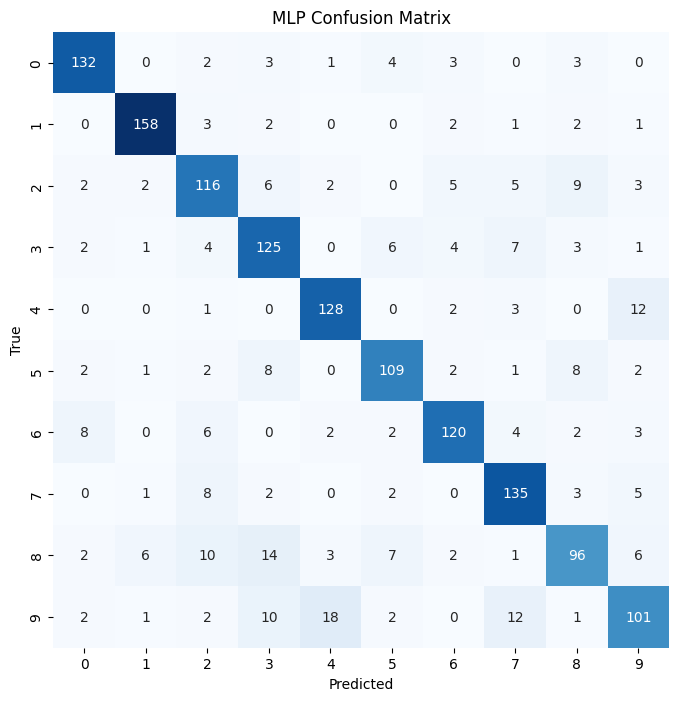

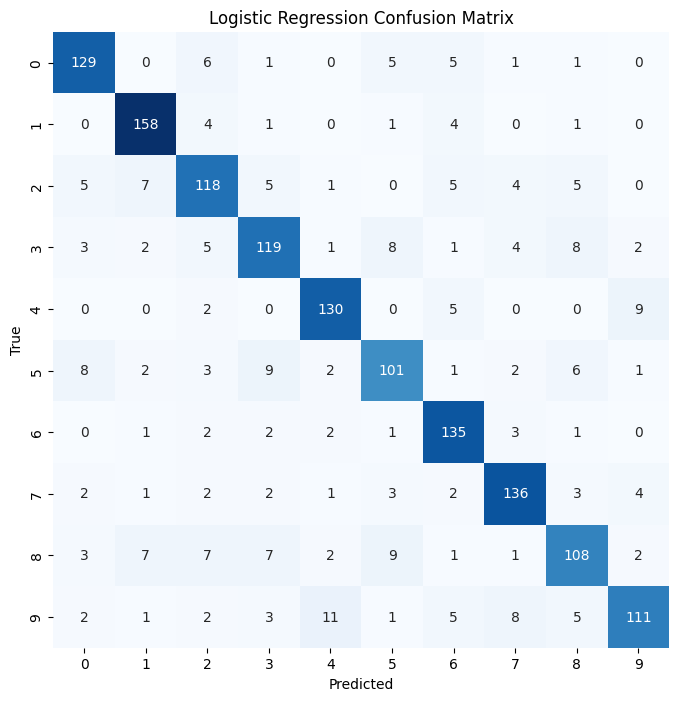

In [10]:
pca = PCA(n_components=100)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

mlp_model = MLPClassifier(hidden_layer_sizes=(50,), max_iter=1000, random_state=42)

start_time_mlp = time.time()
mlp_model.fit(X_train_pca, y_train)
fit_time_mlp = time.time() - start_time_mlp

y_pred_mlp = mlp_model.predict(X_test_pca)

log_reg_model = LogisticRegression(max_iter=1000, solver='lbfgs', multi_class='auto', random_state=42)

start_time_log_reg = time.time()
log_reg_model.fit(X_train_pca, y_train)
fit_time_log_reg = time.time() - start_time_log_reg

y_pred_log_reg = log_reg_model.predict(X_test_pca)

accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
conf_matrix_mlp = confusion_matrix(y_test, y_pred_mlp)

accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)

print(f'MLP Model Accuracy: {accuracy_mlp:.2f}, Fit Time: {fit_time_mlp:.4f} seconds')
print(f'Logistic Regression Model Accuracy: {accuracy_log_reg:.2f}, Fit Time: {fit_time_log_reg:.4f} seconds')

def plot_confusion_matrix(cm, title='Confusion Matrix', cmap=plt.cm.Blues):
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, cbar=False, square=True,
                xticklabels=np.arange(10), yticklabels=np.arange(10))
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(title)
    plt.show()

plot_confusion_matrix(conf_matrix_mlp, title='MLP Confusion Matrix')
plot_confusion_matrix(conf_matrix_log_reg, title='Logistic Regression Confusion Matrix')